<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test" data-toc-modified-id="Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test</a></span><ul class="toc-item"><li><span><a href="#H" data-toc-modified-id="H-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>H</a></span></li></ul></li></ul></div>

In [39]:
%reload_ext watermark
%reload_ext autoreload
%autoreload 2
# %watermark -p numpy,sklearn,pandas
# %watermark -p ipywidgets,cv2,PIL,matplotlib,plotly,netron
# %watermark -p torch,torchvision,torchaudio
# %watermark -p tensorflow,tensorboard,tflite
# %watermark -p onnx,tf2onnx,onnxruntime,tensorrt,tvm
# %matplotlib inline
# %config InlineBackend.figure_format='retina'
%config IPCompleter.use_jedi = False

# from IPython.display import display, Markdown, HTML, IFrame, Image, Javascript
# from IPython.core.magic import register_line_cell_magic, register_line_magic, register_cell_magic
# display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

import sys, os, io, logging, time, random, math
import json, base64, requests, shutil
import argparse, shlex, signal
import numpy as np

argparse.ArgumentParser.exit = lambda *arg, **kwargs: _IGNORE_

def _IMPORT(x):
    try:
        x = x.strip()
        if x[0] == '/' or x[0:2] == './':
            with open(x) as fr:
                x = fr.read()
        elif 'github' in x or 'gitee' in x:
            if x.startswith('import '):
                x = x[7:]
            if x.startswith('https://'):
                x = x[8:]
            if not x.endswith('.py'):
                x = x + '.py'
            x = x.replace('blob/main/', '').replace('blob/master/', '')
            if x.startswith('raw.githubusercontent.com'):
                x = 'https://' + x
                x = requests.get(x)
                if x.status_code == 200:
                    x = x.text
            elif x.startswith('github.com'):
                x = x.replace('github.com', 'raw.githubusercontent.com')
                mod = x.split('/')
                for s in ['main', 'master']:
                    x = 'https://' + '/'.join(mod[:3]) + s + '/'.join(mod[-3:])
                    x = requests.get(x)
                    if x.status_code == 200:
                        x = x.text
                        break
            elif x.startswith('gitee.com'):
                mod = x.split('/')
                for s in ['/raw/main/', '/raw/master/']:
                    x = 'https://' + '/'.join(mod[:3]) + s + '/'.join(mod[3:])
                    x = requests.get(x)
                    if x.status_code == 200:
                        x = x.text
                        break
        exec(x, globals())
    except Exception as err:
        sys.stderr.write(f'request {x} : {err}')

def _DIR(x, dumps=True, ret=True):
    attrs = sorted([y for y in dir(x) if not y.startswith('_')])
    result = '%s: %s' % (str(type(x))[8:-2], json.dumps(attrs) if dumps else attrs)
    if ret:
        return result
    print(result)


In [40]:

###
### Display ###
###

_IMPORT('import pandas as pd')
_IMPORT('import cv2')
_IMPORT('from PIL import Image')
_IMPORT('import matplotlib.pyplot as plt')
_IMPORT('import plotly')
_IMPORT('import plotly.graph_objects as go')
_IMPORT('import ipywidgets as widgets')
_IMPORT('from ipywidgets import interact, interactive, fixed, interact_manual')

# plotly.offline.init_notebook_mode(connected=False)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
def show_image(imgsrc, width=None, height=None):
    if isinstance(imgsrc, np.ndarray):
        img = imgsrc
        if width or height:
            if width and height:
                size = (width, height)
            else:
                rate = img.shape[1] / img.shape[0]
                if width:
                    size = (width, int(width/rate))
                else:
                    size = (int(height*rate), height)
            img = cv2.resize(img, size)
            plt.figure(figsize=(3*int(size[0]/80+1), 3*int(size[1]/80+1)), dpi=80)
        plt.axis('off')
        if len(img.shape) > 2:
            plt.imshow(img);
        else:
            plt.imshow(img, cmap='gray');
        return

    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if imgsrc.startswith('http'):
        data_url = imgsrc
    else:
        if len(imgsrc) > 2048:
            data_url = 'data:image/jpg;base64,' + imgsrc
        else:
            img = open(imgsrc, 'rb').read()
            data_url = 'data:image/jpg;base64,' + base64.b64encode(img).decode()
    return HTML('<center><img %s %s src="%s"/></center>' % (W, H, data_url))


In [41]:
import cv2

In [69]:
frame_bgr = cv2.imread('./_temp2.png')

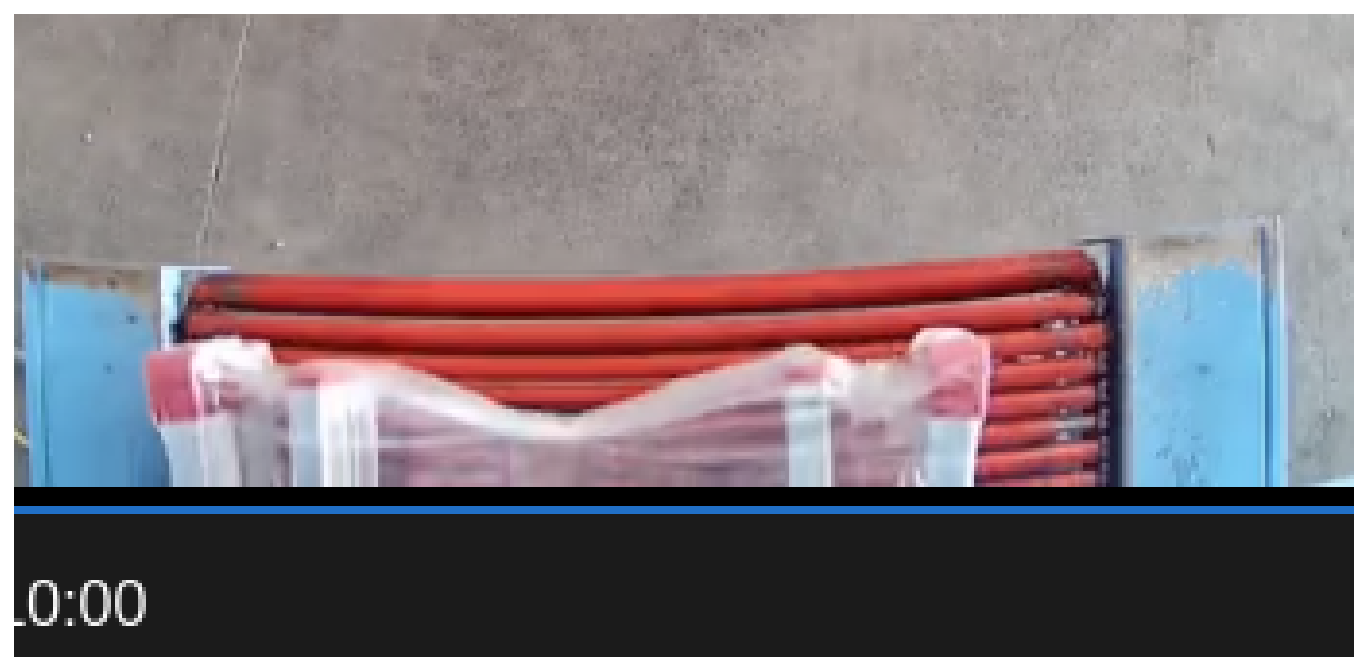

In [70]:
frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

show_image(frame_rgb)

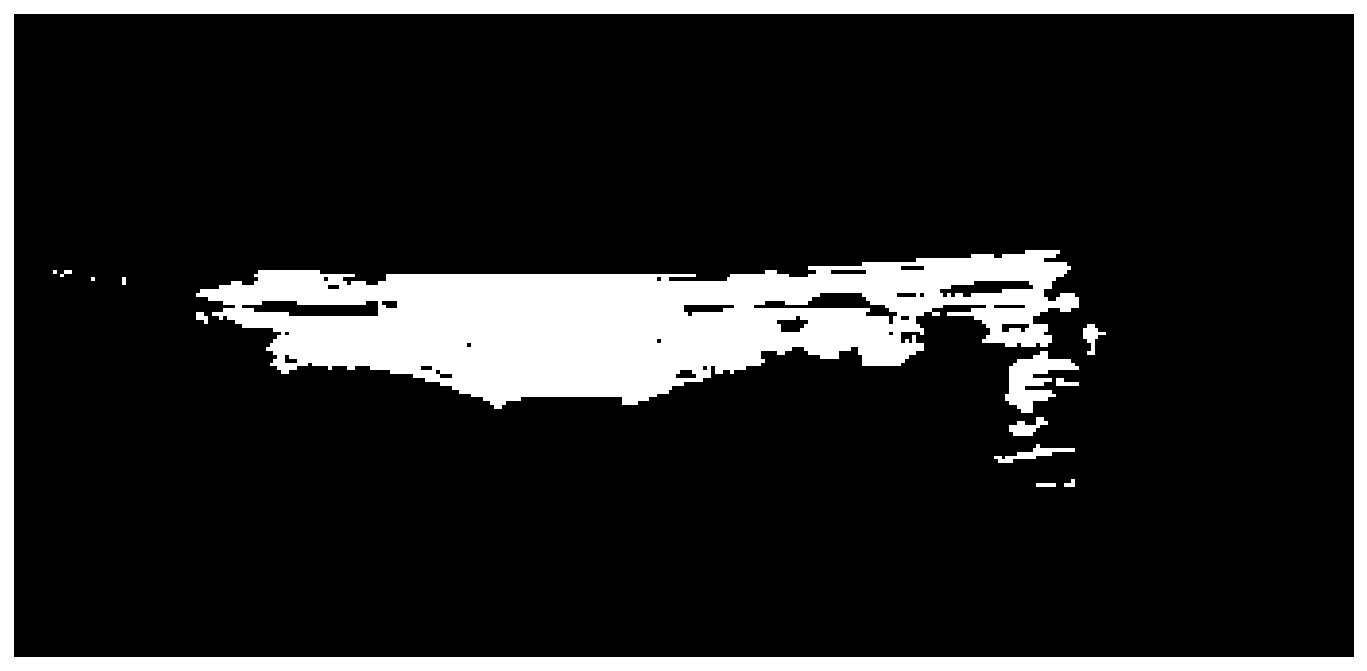

In [74]:
lower_red_1 = np.array([0, 43, 46])
upper_red_1 = np.array([10, 255, 255])
lower_red_2 = np.array([156, 43, 46])
upper_red_2 = np.array([180, 255, 255])
frame_hsv = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2HSV)
mask_red_1 = cv2.inRange(frame_hsv, lower_red_1, upper_red_1)
mask_red_2 = cv2.inRange(frame_hsv, lower_red_2, upper_red_2)
mask_red = cv2.bitwise_or(mask_red_1, mask_red_2)
show_image(mask_red_1)

In [63]:
a = mask_red == 255
a.shape

(228, 335)

In [64]:
np.sum(a) / (228 * 335)

0.3944880858863577

In [65]:
a = 10

if 3 < a < 20:
    print('aa')

aa


In [45]:
import matplotlib.pyplot as plt
    import scipy.stats as stats

x = np.random.randn(1000)

IndentationError: unexpected indent (<ipython-input-45-dc3d91c5fb71>, line 2)

In [ ]:
density = stats.gaussian_kde(x)
n, x, _ = plt.hist(x, bins=10, histtype=u'step', density=True)
plt.plot(x, density(x))

## Test

### H

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load iris dataset
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset")
plt.show()

# Show the principal components
pca = PCA().fit(X)
print("Principal components:")
print(pca.components_)

# Remove PC1
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)
Xremove = X - pc1
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1")
plt.show()

# Remove PC2
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 and PC2")
plt.show()

# Remove PC3
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 to PC3")
plt.show()

# Print the explained variance ratio
print("Explainedd variance ratios:")
print(pca.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Run classifer on all features
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

# Run classifier on PC1
mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

In [ ]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()

In [ ]:
n1 = 200  # size of first sample
n2 = 300  # size of second sample

In [ ]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1, random_state=rng)
rvs2 = stats.norm.rvs(size=n1, loc=0.2, scale=1, random_state=rng)
stats.ks_2samp(rvs1, rvs2)

In [ ]:
rvs1.shape

In [ ]:
np.ra

In [ ]:
a = {}

In [ ]:
if a:
    print('aa')